DATA EXPLORATION AND PREPARATION

This section loads the customer data, checks for duplicates/nulls, inspects basic distributions, and prepares segment columns for downstream analysis.

In [2]:
import pandas as pd
df = pd.read_csv('cac_ltv_model.csv')   # use your uploaded filename here

# Basic info: dimensions and columns
print('Data dimensions:', df.shape)
print('\nColumn names:', df.columns.tolist())

# Look at the first five rows of data
df.head()


Data dimensions: (7057, 15)

Column names: ['year', 'month', 'date', 'customer_id', 'acquisition_channel', 'signup_source', 'region', 'customer_tier', 'plan_price', 'discount_rate', 'arpu', 'gross_margin', 'churn_rate', 'contract_length_months', 'marketing_spend']


,year,month,date,customer_id,acquisition_channel,signup_source,region,customer_tier,plan_price,discount_rate,arpu,gross_margin,churn_rate,contract_length_months,marketing_spend
0,2023,1,Jan-23,1001,outbound_sales,web,North America,Basic,78.84,0.1,63.63,0.76,0.0220,12,212.48
1,2023,1,Jan-23,1002,meta_ads,web,LatAm,Pro,120.23,0.0,124.47,0.84,0.0512,1,352.60
2,2023,1,Jan-23,1003,organic_search,mobile_app,North America,Enterprise,335.82,0.2,278.20,0.81,0.0193,12,55.40
3,2023,1,Jan-23,1004,organic_search,web,Europe,Pro,193.89,0.1,190.65,0.80,0.0842,1,49.10
4,2023,1,Jan-23,1005,organic_search,web,APAC,Enterprise,471.80,0.1,445.32,0.80,0.0773,1,45.27


In [3]:
df.info()
df.isnull().sum()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7057 entries, 0 to 7056
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    7057 non-null   int64  
 1   month                   7057 non-null   int64  
 2   date                    7057 non-null   object 
 3   customer_id             7057 non-null   int64  
 4   acquisition_channel     7057 non-null   object 
 5   signup_source           7057 non-null   object 
 6   region                  7057 non-null   object 
 7   customer_tier           7057 non-null   object 
 8   plan_price              7057 non-null   float64
 9   discount_rate           7057 non-null   float64
 10  arpu                    7057 non-null   float64
 11  gross_margin            7057 non-null   float64
 12  churn_rate              7057 non-null   float64
 13  contract_length_months  7057 non-null   int64  
 14  marketing_spend         7057 non-null   

,year,month,date,customer_id,acquisition_channel,signup_source,region,customer_tier,plan_price,discount_rate,arpu,gross_margin,churn_rate,contract_length_months,marketing_spend
count,7057.000000,7057.000000,7057,7057.000000,7057,7057,7057,7057,7057.000000,7057.000000,7057.000000,7057.000000,7057.000000,7057.000000,7057.000000
unique,NaN,NaN,24,NaN,4,3,6,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Oct-23,NaN,organic_search,web,North America,Pro,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,393,NaN,1780,2375,2111,2372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2023.484200,6.600397,NaN,4529.000000,NaN,NaN,NaN,NaN,190.186119,0.099915,171.469620,0.825111,0.053075,5.376931,249.119034
std,0.499786,3.434954,NaN,2037.324757,NaN,NaN,NaN,NaN,126.801090,0.081563,117.188685,0.043757,0.029513,5.384498,139.323066
min,2023.000000,1.000000,NaN,1001.000000,NaN,NaN,NaN,NaN,49.030000,0.000000,34.180000,0.750000,0.010000,1.000000,42.500000
25%,2023.000000,4.000000,NaN,2765.000000,NaN,NaN,NaN,NaN,86.920000,0.000000,77.260000,0.790000,0.022100,1.000000,57.350000
50%,2023.000000,7.000000,NaN,4529.000000,NaN,NaN,NaN,NaN,149.500000,0.100000,133.680000,0.830000,0.058500,1.000000,229.320000
75%,2024.000000,10.000000,NaN,6293.000000,NaN,NaN,NaN,NaN,274.090000,0.200000,241.650000,0.860000,0.079200,12.000000,372.360000


In [4]:
#duplicate check
duplicates = df.duplicated().sum()
print(f'Duplicate rows: {duplicates}')
if duplicates > 0:
    df = df.drop_duplicates()
    print('Duplicates dropped!')

Duplicate rows: 0


In [8]:
#data type check
print(df.dtypes)
# Example fixes:
df['date'] = pd.to_datetime(df['date'], format='%b-%y')  # If present and not already datetime
segment_cols = ['region', 'customer_tier', 'acquisition_channel', 'signup_source']
for col in segment_cols:
    df[col] = df[col].astype('category')


year                               int64
month                              int64
date                      datetime64[ns]
customer_id                        int64
acquisition_channel             category
signup_source                   category
region                          category
customer_tier                   category
plan_price                       float64
discount_rate                    float64
arpu                             float64
gross_margin                     float64
churn_rate                       float64
contract_length_months             int64
marketing_spend                  float64
dtype: object


In [9]:
#unique value check
for col in segment_cols:
    print(f"{col}: {df[col].unique()}")

region: ['North America', 'LatAm', 'Europe', 'APAC', 'Middle East', 'Africa']
Categories (6, object): ['APAC', 'Africa', 'Europe', 'LatAm', 'Middle East', 'North America']
customer_tier: ['Basic', 'Pro', 'Enterprise']
Categories (3, object): ['Basic', 'Enterprise', 'Pro']
acquisition_channel: ['outbound_sales', 'meta_ads', 'organic_search', 'google_ads']
Categories (4, object): ['google_ads', 'meta_ads', 'organic_search', 'outbound_sales']
signup_source: ['web', 'mobile_app', 'partner']
Categories (3, object): ['mobile_app', 'partner', 'web']


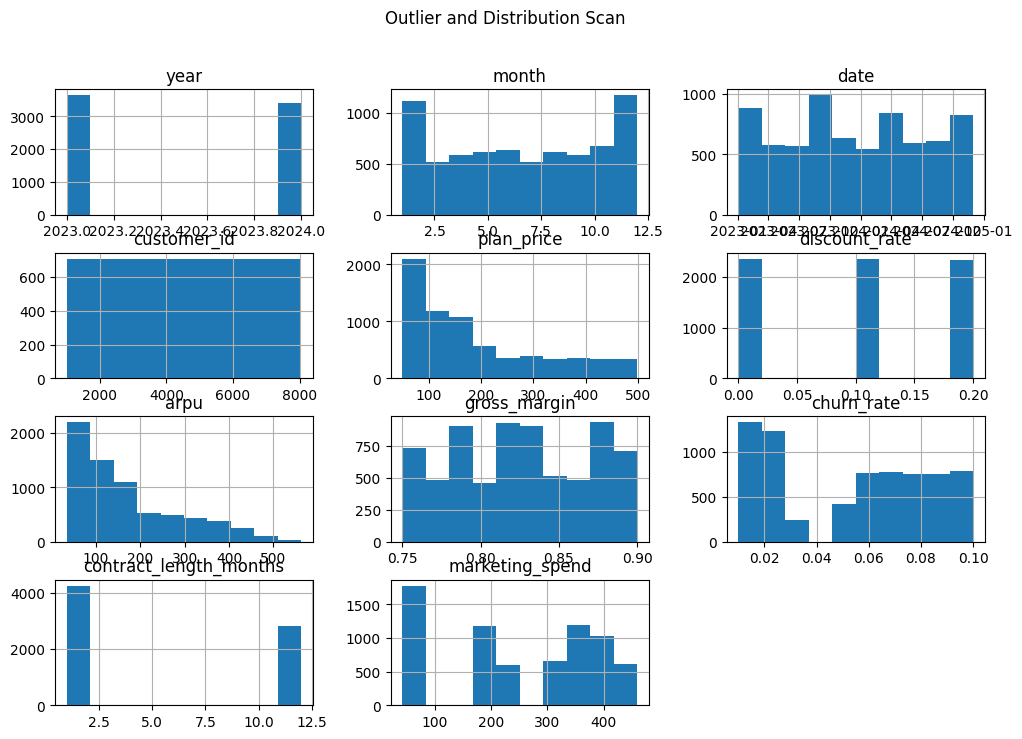

In [11]:
#outlier and distribution scan
import matplotlib.pyplot as plt
df.hist(figsize=(12,8))
plt.suptitle('Outlier and Distribution Scan')
plt.show()


In [12]:
#summary statistics safeguard
for col in ['plan_price', 'discount_rate', 'arpu', 'gross_margin', 'churn_rate', 'contract_length_months', 'marketing_spend']:
    print(f"{col}: min={df[col].min()}, max={df[col].max()}")


plan_price: min=49.03, max=498.98
discount_rate: min=0.0, max=0.2
arpu: min=34.18, max=563.02
gross_margin: min=0.75, max=0.9
churn_rate: min=0.01, max=0.1
contract_length_months: min=1, max=12
marketing_spend: min=42.5, max=459.99


In [13]:
#null and invalid value handling
print(df.isnull().sum())
for col in df.columns:
    print(df[col].value_counts(dropna=False).head(10))


year                      0
month                     0
date                      0
customer_id               0
acquisition_channel       0
signup_source             0
region                    0
customer_tier             0
plan_price                0
discount_rate             0
arpu                      0
gross_margin              0
churn_rate                0
contract_length_months    0
marketing_spend           0
dtype: int64
year
2023    3640
2024    3417
Name: count, dtype: int64
month
10    673
6     642
8     621
5     616
1     610
11    600
9     586
4     585
12    576
3     522
Name: count, dtype: int64
date
2023-10-01    393
2024-08-01    391
2023-09-01    365
2024-05-01    348
2023-06-01    336
2023-11-01    331
2024-01-01    308
2023-03-01    307
2024-06-01    306
2023-04-01    306
Name: count, dtype: int64
customer_id
8057    1
8041    1
8040    1
8039    1
8038    1
8037    1
8036    1
8035    1
8034    1
8033    1
Name: count, dtype: int64
acquisition_channel
organic_s

In [14]:
#sample review
print(df.sample(5))

      year  month       date  customer_id acquisition_channel signup_source  \
2981  2023     10 2023-10-01         3982          google_ads           web   
1090  2023      4 2023-04-01         2091            meta_ads    mobile_app   
3033  2023     11 2023-11-01         4034            meta_ads    mobile_app   
5816  2024      8 2024-08-01         6817      outbound_sales           web   
505   2023      2 2023-02-01         1506            meta_ads    mobile_app   

             region customer_tier  plan_price  discount_rate    arpu  \
2981  North America         Basic       96.18            0.1   79.66   
1090         Europe           Pro      114.67            0.2  102.20   
3033    Middle East           Pro      156.98            0.0  152.19   
5816         Europe    Enterprise      411.09            0.2  356.27   
505   North America         Basic       64.73            0.2   46.57   

      gross_margin  churn_rate  contract_length_months  marketing_spend  
2981          0.81

METRIC SEGMENTATION AND ANALYSING BUSINESS DRIVERS

This section loads the customer data, checks for duplicates/nulls, inspects basic distributions, and prepares segment columns for downstream analysis.

In [15]:
# Segment metrics
# By Region
region_summary = df.groupby('region').agg({
    'arpu': 'mean',
    'churn_rate': 'mean',
    'gross_margin': 'mean',
    'customer_id': 'nunique'
}).rename(columns={'customer_id': 'unique_customers'})
print("Metrics by Region:")
print(region_summary.sort_values('arpu', ascending=False))

# By Customer Tier
tier_summary = df.groupby('customer_tier').agg({
    'arpu': 'mean',
    'churn_rate': 'mean',
    'gross_margin': 'mean',
    'customer_id': 'nunique'
}).rename(columns={'customer_id': 'unique_customers'})
print("\nMetrics by Customer Tier:")
print(tier_summary.sort_values('arpu', ascending=False))

# By Acquisition Channel
channel_summary = df.groupby('acquisition_channel').agg({
    'arpu': 'mean',
    'churn_rate': 'mean',
    'gross_margin': 'mean',
    'customer_id': 'nunique'
}).rename(columns={'customer_id': 'unique_customers'})
print("\nMetrics by Acquisition Channel:")
print(channel_summary.sort_values('arpu', ascending=False))


Metrics by Region:
                     arpu  churn_rate  gross_margin  unique_customers
region                                                               
LatAm          176.075538    0.053756      0.825803               679
Africa         173.587615    0.052475      0.828161               348
Europe         173.540112    0.052686      0.823537              1781
North America  171.670417    0.053100      0.826722              2111
APAC           169.950000    0.052932      0.823775              1433
Middle East    163.245092    0.053914      0.824809               705

Metrics by Customer Tier:
                     arpu  churn_rate  gross_margin  unique_customers
customer_tier                                                        
Enterprise     312.926034    0.053081      0.824435              2345
Pro            135.083642    0.053123      0.825586              2372
Basic           66.594513    0.053021      0.825308              2340

Metrics by Acquisition Channel:
           

/tmp/ipython-input-1651504450.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_summary = df.groupby('region').agg({
/tmp/ipython-input-1651504450.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tier_summary = df.groupby('customer_tier').agg({
/tmp/ipython-input-1651504450.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  channel_summary = df.groupby('acquisition_channel').agg({


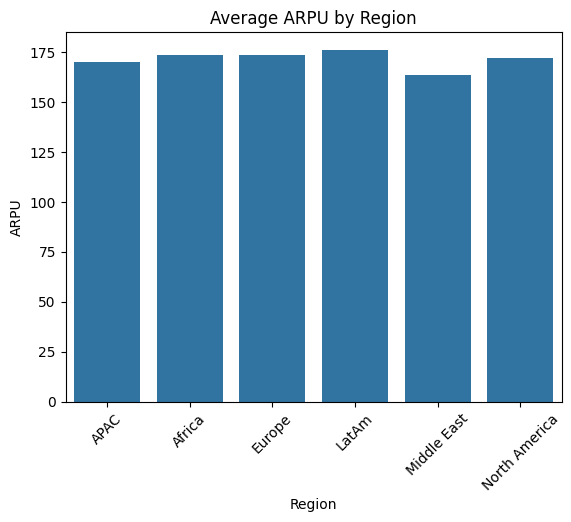

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# ARPU by Region
sns.barplot(x=region_summary.index, y=region_summary['arpu'])
plt.title('Average ARPU by Region')
plt.xlabel('Region')
plt.ylabel('ARPU')
plt.xticks(rotation=45)
plt.show()


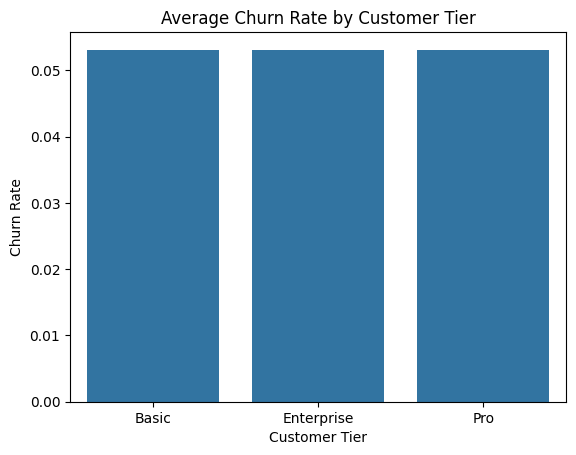

In [18]:

# Churn Rate by Tier
sns.barplot(x=tier_summary.index, y=tier_summary['churn_rate'])
plt.title('Average Churn Rate by Customer Tier')
plt.xlabel('Customer Tier')
plt.ylabel('Churn Rate')
plt.show()


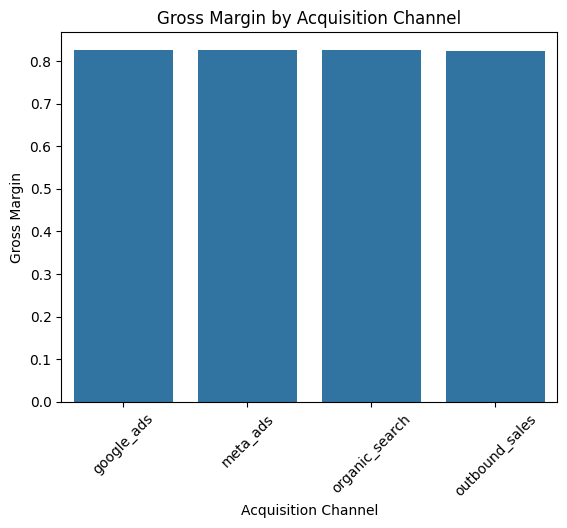

In [19]:

# Gross Margin by Acquisition Channel
sns.barplot(x=channel_summary.index, y=channel_summary['gross_margin'])
plt.title('Gross Margin by Acquisition Channel')
plt.xlabel('Acquisition Channel')
plt.ylabel('Gross Margin')
plt.xticks(rotation=45)
plt.show()

COHORT ANALYSIS - SIGNUP TRENDS BY MONTH

This section analyzes trends in customer signup behavior and segment performance over time.
We calculate average ARPU, churn rate, and customer count by signup month ("cohort"), and visualize how business metrics evolve across cohorts.

   signup_month        arpu  churn_rate  customer_id
0       2023-01  170.535066    0.053272          302
1       2023-02  170.677222    0.051625          270
2       2023-03  168.055147    0.051842          307
3       2023-04  168.016111    0.053829          306
4       2023-05  175.678657    0.050894          268
5       2023-06  174.462500    0.051666          336
6       2023-07  161.324000    0.054549          230
7       2023-08  177.106826    0.053737          230
8       2023-09  172.931479    0.052166          365
9       2023-10  167.719033    0.055859          393
10      2023-11  173.930060    0.053051          331
11      2023-12  166.605033    0.051398          302
12      2024-01  174.897727    0.052768          308
13      2024-02  161.070380    0.054130          237
14      2024-03  162.241535    0.055469          215
15      2024-04  187.289391    0.054942          279
16      2024-05  166.038649    0.052899          348
17      2024-06  171.346373    0.051350       

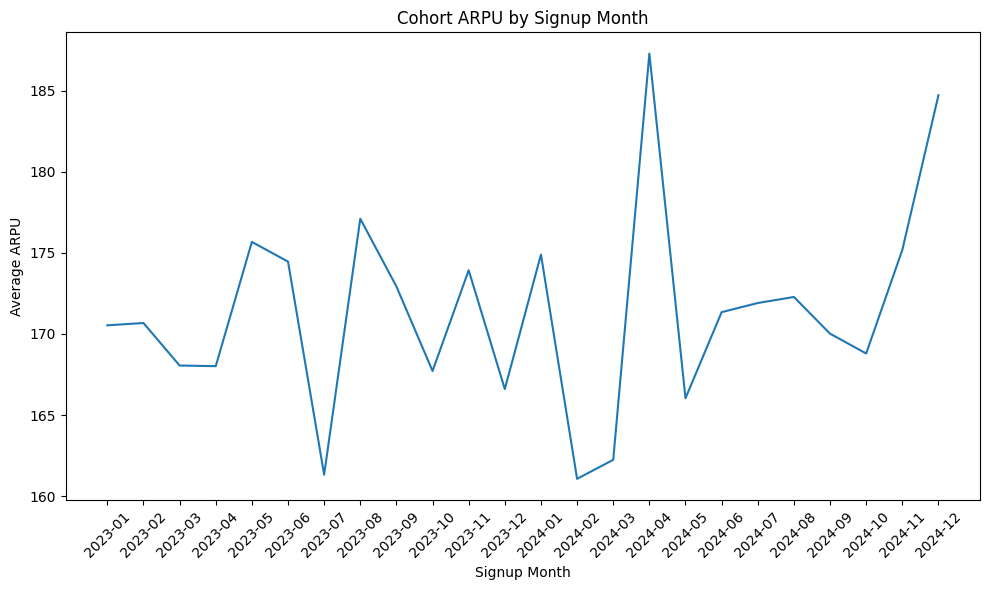

In [20]:
# Signup trends by month

df['signup_month'] = df['date'].dt.to_period('M')  # Make sure 'date' is datetime64
cohort_metrics = df.groupby('signup_month').agg({
    'arpu': 'mean',
    'churn_rate': 'mean',
    'customer_count': 'nunique'
}).reset_index()
print(cohort_metrics)
# Visualize ARPU over time
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(cohort_metrics['signup_month'].astype(str), cohort_metrics['arpu'])
plt.title('Cohort ARPU by Signup Month')
plt.xlabel('Signup Month')
plt.ylabel('Average ARPU')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


CUSTOMER LIFETIME VALUE BY SEGMENT

This section estimates customer lifetime value (LTV) as ARPU divided by churn rate, group by customer tier. It identifies which segments are most valuable for long-term retention.

In [21]:
# Customer Lifetime value by segment
#Estimate LTV: ARPU / Churn Rate (approx.)
df['ltv'] = df['arpu'] / df['churn_rate']
ltv_by_tier = df.groupby('customer_tier')['ltv'].mean().sort_values(ascending=False)
print("Estimated LTV by Customer Tier:")
print(ltv_by_tier)


Estimated LTV by Customer Tier:
customer_tier
Enterprise    9463.454548
Pro           4089.634143
Basic         2042.969276
Name: ltv, dtype: float64


/tmp/ipython-input-3057903819.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ltv_by_tier = df.groupby('customer_tier')['ltv'].mean().sort_values(ascending=False)


CHURN ROOT CAUSE ANALYSIS

Here, we explore what drives churn using visualizations (e.g., churn by discount rate, contract length). This delivers actionable insights on which levers most affect retention.

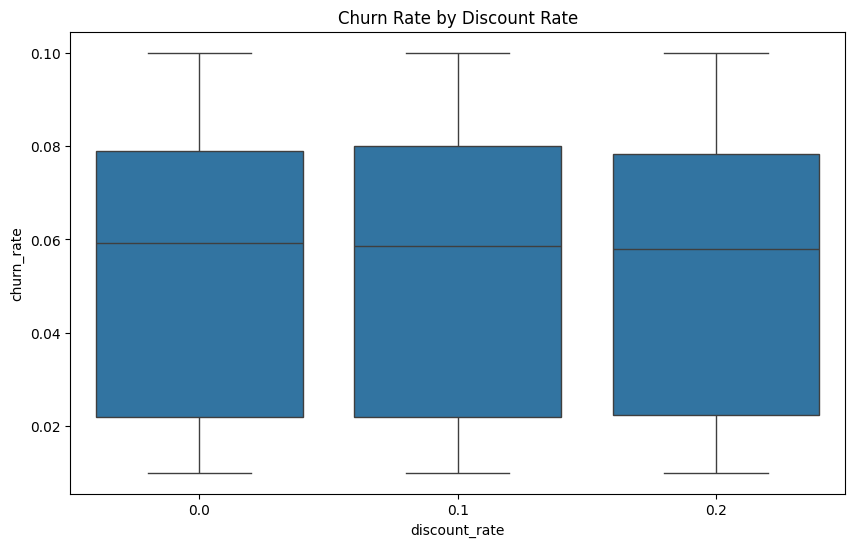

In [22]:
# Churn root cause analysis
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(x='discount_rate', y='churn_rate', data=df)
plt.title('Churn Rate by Discount Rate')
plt.show()


CHANNEL ROI AND MARKETING EFFICIENCY

This section analyzes return on investment (ROI) by acquisition channel, calculating metrics like ARPU, gross margin, marketing spend, and resulting ROI. This helps optimize future marketing allocations.

In [23]:
# churn by contract length
contract_churn = df.groupby('contract_length_months')['churn_rate'].mean()
print("Average Churn Rate by Contract Length:")
print(contract_churn)



Average Churn Rate by Contract Length:
contract_length_months
1     0.075063
12    0.019802
Name: churn_rate, dtype: float64


In [24]:
#Channel ROI and marketing efficiency
roi_by_channel = df.groupby('acquisition_channel').agg({
    'arpu': 'mean',
    'marketing_spend': 'mean',
    'gross_margin': 'mean',
    'customer_id': 'nunique'
})
roi_by_channel['roi'] = roi_by_channel['arpu'] / roi_by_channel['marketing_spend']
print("Channel ROI Table:")
print(roi_by_channel.sort_values('roi', ascending=False))


Channel ROI Table:
                           arpu  marketing_spend  gross_margin  customer_id  \
acquisition_channel                                                           
organic_search       171.136107        49.953860      0.826309         1780   
outbound_sales       173.607192       200.221299      0.824107         1770   
meta_ads             168.788583       349.271671      0.825020         1771   
google_ads           172.367241       401.015737      0.825000         1736   

                          roi  
acquisition_channel            
organic_search       3.425884  
outbound_sales       0.867077  
meta_ads             0.483259  
google_ads           0.429827  


/tmp/ipython-input-1188788267.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  roi_by_channel = df.groupby('acquisition_channel').agg({


PREDICTIVE CHURN MODELING AND BUSINESS INSIGHTS

From here, we define churn, encode features, train/test split, and fit ML models (Logistic Regression and Random Forest). We then evaluate, explain, and segment results for targeted business action.

In [25]:
# Target variable: Define churn as churn_rate > typical cutoff (try 0.07 or your business threshold)
df['churn_label'] = (df['churn_rate'] > 0.07).astype(int)

# Feature selection: Pick relevant business drivers
features = [
    'arpu',
    'discount_rate',
    'contract_length_months',
    'plan_price',
    'gross_margin'
]
# For categorical variables (channel, tier, region), use one-hot encoding if you want:
df = pd.get_dummies(df, columns=['customer_tier', 'acquisition_channel', 'region'], drop_first=True)
# Add these dummies to 'features' as appropriate

# Create feature matrix and target vector
X = df[features]  # plus any dummies you create
y = df['churn_label']


In [26]:
# train and test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
# training logistic regression model
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [28]:
# Result evaluation
from sklearn.metrics import classification_report, confusion_matrix

print("Churn Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance (coefficients)
import pandas as pd
feature_imp = pd.Series(clf.coef_[0], index=X.columns)
print("Feature Importance:\n", feature_imp.sort_values(ascending=False))


Churn Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.63      0.77       934
           1       0.58      1.00      0.73       478

    accuracy                           0.75      1412
   macro avg       0.79      0.81      0.75      1412
weighted avg       0.86      0.75      0.76      1412

Confusion Matrix:
[[588 346]
 [  0 478]]
Feature Importance:
 discount_rate             0.416690
arpu                      0.002521
plan_price               -0.002396
gross_margin             -0.297589
contract_length_months   -0.960205
dtype: float64


Random Forest Churn Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.68      0.81       934
           1       0.62      1.00      0.76       478

    accuracy                           0.79      1412
   macro avg       0.81      0.84      0.79      1412
weighted avg       0.87      0.79      0.79      1412

Confusion Matrix: [[637 297]
 [  1 477]]
Top Feature Importances:
 contract_length_months           0.541065
ltv                              0.335251
arpu                             0.048394
plan_price                       0.035988
marketing_spend                  0.012248
customer_tier_Enterprise_True    0.008337
gross_margin                     0.006107
discount_rate                    0.002894
customer_tier_Pro_True           0.001989
region_Europe_True               0.001884
dtype: float64


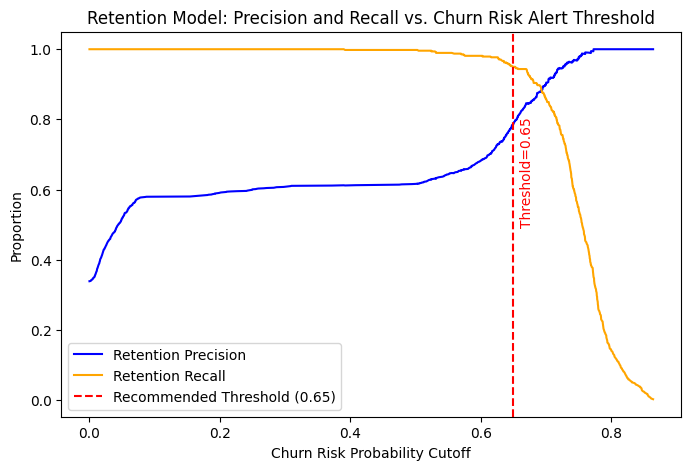

At threshold 0.65: Precision=0.79, Recall=0.95
Cross-validated F1 scores: [0.77897991 0.78112916 0.75111111 0.77777778 0.78543765]
Mean F1-score: 0.7748871196777326


In [35]:
#Random forest churn prediction
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt

# 1. Only use numeric & dummy columns for features (no date/time columns)
features = [
    'plan_price', 'discount_rate', 'arpu', 'gross_margin',
    'contract_length_months', 'marketing_spend', 'ltv',
    'customer_tier_Enterprise_True', 'customer_tier_Pro_True',
    'acquisition_channel_meta_ads_True', 'acquisition_channel_organic_search_True', 'acquisition_channel_outbound_sales_True',
    'region_Africa_True', 'region_Europe_True', 'region_LatAm_True', 'region_Middle East_True', 'region_North America_True'
]

X = df[features]
y = (df['churn_rate'] > 0.07).astype(int)

# 2. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=7, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

# 4. Evaluation
print("Random Forest Churn Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))

feat_imp = pd.Series(rf.feature_importances_, index=X.columns)
print("Top Feature Importances:\n", feat_imp.sort_values(ascending=False)[:10])

# 5. Precision-Recall Curve with Business Threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
recommended_thresh = 0.65
recommended_idx = np.argmin(np.abs(thresholds - recommended_thresh))

plt.figure(figsize=(8,5))
plt.plot(thresholds, precision[:-1], label='Retention Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Retention Recall', color='orange')
plt.axvline(x=thresholds[recommended_idx], color='red', linestyle='--', label=f'Recommended Threshold ({thresholds[recommended_idx]:.2f})')
plt.xlabel('Churn Risk Probability Cutoff')
plt.ylabel('Proportion')
plt.title('Retention Model: Precision and Recall vs. Churn Risk Alert Threshold')
plt.legend(loc='lower left')
plt.text(thresholds[recommended_idx]+0.01, 0.5, f'Threshold={thresholds[recommended_idx]:.2f}', rotation=90, color='red')
plt.show()

print(f"At threshold {thresholds[recommended_idx]:.2f}: Precision={precision[recommended_idx]:.2f}, Recall={recall[recommended_idx]:.2f}")

# 6. Cross-validation for reliability
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='f1')
print("Cross-validated F1 scores:", cv_scores)
print("Mean F1-score:", cv_scores.mean())


CHURN SEGMENTAION AND RECOMMENDATIONS

Final business outputs: Identifying the highest-risk regions/channels and summarizing exactly where to focus retention for maximum customer and revenue impact.

In [38]:

# CHURN SEGMENTATION ANALYSIS
# This analysis identifies which regions and acquisition channels
# have the highest churn risk based on the Random Forest model predictions.
# Business insight: Target high-risk segments for retention campaigns.

import pandas as pd
import numpy as np

# Generate churn probability predictions for all customers
y_prob_all = rf.predict_proba(X)[:, 1]
df['churn_probability'] = y_prob_all


# 1. CHURN RISK BY REGION

# Calculate average churn probability for each region
# Use the one-hot encoded columns with '_True' suffix

region_columns = [
    'region_Africa_True',
    'region_Europe_True',
    'region_LatAm_True',
    'region_Middle East_True',
    'region_North America_True'
]

# Map each customer to their region based on True values
region_churn = []
for col in region_columns:
    if col in df.columns:
        region_name = col.replace('region_', '').replace('_True', '')
        avg_churn_prob = df[df[col] == True]['churn_probability'].mean()
        customer_count = df[df[col] == True].shape[0]
        region_churn.append({
            'Region': region_name,
            'Avg_Churn_Probability': avg_churn_prob,
            'Customer_Count': customer_count
        })

# Add the base region (APAC - not in one-hot encoded columns due to drop_first=True)
apac_churn_prob = df[(df['region_Africa_True'] == False) &
                     (df['region_Europe_True'] == False) &
                     (df['region_LatAm_True'] == False) &
                     (df['region_Middle East_True'] == False) &
                     (df['region_North America_True'] == False)]['churn_probability'].mean()
apac_count = df[(df['region_Africa_True'] == False) &
                (df['region_Europe_True'] == False) &
                (df['region_LatAm_True'] == False) &
                (df['region_Middle East_True'] == False) &
                (df['region_North America_True'] == False)].shape[0]
region_churn.append({
    'Region': 'APAC',
    'Avg_Churn_Probability': apac_churn_prob,
    'Customer_Count': apac_count
})

# Create DataFrame and sort by risk (highest first)
region_risk_df = pd.DataFrame(region_churn)
region_risk_df = region_risk_df.sort_values('Avg_Churn_Probability', ascending=False)
region_risk_df['Risk_Level'] = ['High' if x > 0.4 else 'Medium' if x > 0.3 else 'Low'
                                 for x in region_risk_df['Avg_Churn_Probability']]

print("CHURN RISK SEGMENTATION BY REGION")

print(region_risk_df.to_string(index=False))
print("\n")


# 2. CHURN RISK BY ACQUISITION CHANNEL

# Calculate average churn probability for each channel

channel_columns = [
    'acquisition_channel_meta_ads_True',
    'acquisition_channel_organic_search_True',
    'acquisition_channel_outbound_sales_True'
]

channel_churn = []
for col in channel_columns:
    if col in df.columns:
        channel_name = col.replace('acquisition_channel_', '').replace('_True', '')
        avg_churn_prob = df[df[col] == True]['churn_probability'].mean()
        customer_count = df[df[col] == True].shape[0]
        channel_churn.append({
            'Acquisition_Channel': channel_name,
            'Avg_Churn_Probability': avg_churn_prob,
            'Customer_Count': customer_count
        })

# Add the base channel (google_ads - not in one-hot encoded due to drop_first=True)
google_ads_churn = df[(df['acquisition_channel_meta_ads_True'] == False) &
                       (df['acquisition_channel_organic_search_True'] == False) &
                       (df['acquisition_channel_outbound_sales_True'] == False)]['churn_probability'].mean()
google_ads_count = df[(df['acquisition_channel_meta_ads_True'] == False) &
                       (df['acquisition_channel_organic_search_True'] == False) &
                       (df['acquisition_channel_outbound_sales_True'] == False)].shape[0]
channel_churn.append({
    'Acquisition_Channel': 'google_ads',
    'Avg_Churn_Probability': google_ads_churn,
    'Customer_Count': google_ads_count
})

# Create DataFrame and sort by risk (highest first)
channel_risk_df = pd.DataFrame(channel_churn)
channel_risk_df = channel_risk_df.sort_values('Avg_Churn_Probability', ascending=False)
channel_risk_df['Risk_Level'] = ['High' if x > 0.4 else 'Medium' if x > 0.3 else 'Low'
                                  for x in channel_risk_df['Avg_Churn_Probability']]


print("CHURN RISK SEGMENTATION BY ACQUISITION CHANNEL")

print(channel_risk_df.to_string(index=False))
print("\n")


# 3. KEY INSIGHTS SUMMARY

print("KEY INSIGHTS FOR RETENTION STRATEGY")
print(f"\nHighest Risk Region: {region_risk_df.iloc[0]['Region']} ")
print(f"  - Churn Probability: {region_risk_df.iloc[0]['Avg_Churn_Probability']:.2%}")
print(f"  - Affected Customers: {region_risk_df.iloc[0]['Customer_Count']:,.0f}")

print(f"\nHighest Risk Channel: {channel_risk_df.iloc[0]['Acquisition_Channel']}")
print(f"  - Churn Probability: {channel_risk_df.iloc[0]['Avg_Churn_Probability']:.2%}")
print(f"  - Affected Customers: {channel_risk_df.iloc[0]['Customer_Count']:,.0f}")

CHURN RISK SEGMENTATION BY REGION
       Region  Avg_Churn_Probability  Customer_Count Risk_Level
        LatAm               0.436553             679       High
  Middle East               0.435626             705       High
North America               0.425962            2111       High
         APAC               0.422801            1433       High
       Africa               0.410325             348       High
       Europe               0.408926            1781       High


CHURN RISK SEGMENTATION BY ACQUISITION CHANNEL
Acquisition_Channel  Avg_Churn_Probability  Customer_Count Risk_Level
         google_ads               0.436850            1736       High
     outbound_sales               0.420219            1770       High
           meta_ads               0.418327            1771       High
     organic_search               0.413871            1780       High


KEY INSIGHTS FOR RETENTION STRATEGY

Highest Risk Region: LatAm 
  - Churn Probability: 43.66%
  - Affected Customers